# Завдання 1

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Вивести перших 5 рядків.

In [ ]:
url="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables=pd.read_html(url)
df=tables[2]

2. Визначити розмір датасета.

In [ ]:
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

3. Визначити оптимальну кількість стовпців.

In [ ]:
df.shape

(210, 7)

4. Змінити назви стовпців на більш зручні.

In [ ]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [ ]:
current_colums = [('Country/Territory','Country/Territory'),
    ('IMF[1][13]','Forecast'),
    ('IMF[1][13]','Year'),
    ('WorldBank[14]','Estimate'),
    ('WorldBank[14]','YearYear'),
    ('United Nations[15]','Estimate'),
    ('United Nations[15]', 'Year')]

new_columns = ['Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Eastimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year']

df.columns=new_columns
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Eastimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [ ]:
selected_columns={'IMF_Forecast':'MVF_2024',
    'WorldBank_Eastimate':'WorldBank_2023',
    'UN_Estimate':'OON_2022'}

df1= df[['Country']+list(selected_columns.keys())]
df=df1.rename(columns=selected_columns)
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


5. Визначити тип даних.

In [ ]:
df.dtypes

,0
Country,object
MVF_2024,object
WorldBank_2023,object
OON_2022,object


In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [ ]:
df.replace('-',float('nan'),inplace=True)
df['MVF_2024 ']=pd.to_numeric(df['MVF_2024'],errors='coerce')
df['WorldBank_2023']=pd.to_numeric(df['WorldBank_2023'],errors='coerce')
df['OON_2022']=pd.to_numeric(df['OON_2022'],errors='coerce')
print("",df.dtypes)
df.head(10)

 Country            object
MVF_2024           object
WorldBank_2023    float64
OON_2022          float64
MVF_2024          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022,MVF_2024
0,World,109529216,105435540.0,100834796.0,109529216.0
1,United States,28781083,27360935.0,25744100.0,28781083.0
2,China,18532633,17794782.0,17963170.0,18532633.0
3,Germany,4591100,4456081.0,4076923.0,4591100.0
4,Japan,4110452,4212945.0,4232173.0,4110452.0
5,India,3937011,3549919.0,3465541.0,3937011.0
6,United Kingdom,3495261,3340032.0,3089072.0,3495261.0
7,France,3130014,3030904.0,2775316.0,3130014.0
8,Brazil,2331391,2173666.0,1920095.0,2331391.0
9,Italy,2328028,2254851.0,2046952.0,2328028.0


In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,8
OON_2022,1
MVF_2024,15


6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

In [ ]:
df=df.replace({'-':np.NaN})
df=df.fillna(df.mean(numeric_only=True),axis=0)
df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022,MVF_2024
0,World,109529216,105435540.0,100834796.0,109529216.0
1,United States,28781083,27360935.0,25744100.0,28781083.0
2,China,18532633,17794782.0,17963170.0,18532633.0
3,Germany,4591100,4456081.0,4076923.0,4591100.0
4,Japan,4110452,4212945.0,4232173.0,4110452.0


7. Ще раз перевірити наявність пропущених значень.

In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0
MVF_2024,0


8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [ ]:
duplicates = df.duplicated().sum()
print(f'Кількість дублікатів: {duplicates}')
df_cleaned = df.drop_duplicates()
print(df_cleaned)
df.head(5)

Кількість дублікатів: 0
              Country   MVF_2024  WorldBank_2023     OON_2022    MVF_2024 
0               World  109529216     105435540.0  100834796.0  109529216.0
1       United States   28781083      27360935.0   25744100.0   28781083.0
2               China   18532633      17794782.0   17963170.0   18532633.0
3             Germany    4591100       4456081.0    4076923.0    4591100.0
4               Japan    4110452       4212945.0    4232173.0    4110452.0
..                ...        ...             ...          ...          ...
205          Kiribati        311           279.0        223.0        311.0
206             Palau        308           263.0        225.0        308.0
207  Marshall Islands        305           284.0        279.0        305.0
208             Nauru        161           154.0        147.0        161.0
209            Tuvalu         66            62.0         59.0         66.0

[210 rows x 5 columns]


,Country,MVF_2024,WorldBank_2023,OON_2022,MVF_2024
0,World,109529216,105435540.0,100834796.0,109529216.0
1,United States,28781083,27360935.0,25744100.0,28781083.0
2,China,18532633,17794782.0,17963170.0,18532633.0
3,Germany,4591100,4456081.0,4076923.0,4591100.0
4,Japan,4110452,4212945.0,4232173.0,4110452.0


9. Вивести описову статистику датасету describe().

In [ ]:
description = df.describe(include='all')
print(description)
df.head(5)

       Country MVF_2024  WorldBank_2023      OON_2022     MVF_2024 
count      210      210    2.100000e+02  2.100000e+02  2.100000e+02
unique     210      196             NaN           NaN           NaN
top      World        —             NaN           NaN           NaN
freq         1       15             NaN           NaN           NaN
mean       NaN      NaN    1.037206e+06  9.612699e+05  1.123228e+06
std        NaN      NaN    7.602076e+06  7.275608e+06  7.900707e+06
min        NaN      NaN    6.200000e+01  5.900000e+01  6.600000e+01
25%        NaN      NaN    1.044175e+04  8.928250e+03  1.464775e+04
50%        NaN      NaN    4.341600e+04  3.210250e+04  6.215800e+04
75%        NaN      NaN    3.376592e+05  2.412485e+05  4.366365e+05
max        NaN      NaN    1.054355e+08  1.008348e+08  1.095292e+08


,Country,MVF_2024,WorldBank_2023,OON_2022,MVF_2024
0,World,109529216,105435540.0,100834796.0,109529216.0
1,United States,28781083,27360935.0,25744100.0,28781083.0
2,China,18532633,17794782.0,17963170.0,18532633.0
3,Germany,4591100,4456081.0,4076923.0,4591100.0
4,Japan,4110452,4212945.0,4232173.0,4110452.0


10. Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?

In [ ]:
countries = ['World', 'United States	', 'China', 'Germany	', 'Japan	']
MVF_2024 = [109529216.0,28781083.0,18532633.0,4591100.0,4110452.0]
WorldBank_2023 = [105435540.0,27360935.0,17794782.0,4456081.0,4212945.0]

data = {'Country': countries,
    'MVF_2024': MVF_2024,
    'WorldBank_2023': WorldBank_2023}

df = pd.DataFrame(data)
df['Deviation'] = df['MVF_2024'] - df['WorldBank_2023']
df_sorted = df.sort_values(by='Deviation', ascending=False)
print("Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023:")
print(df_sorted[['Country', 'Deviation']])
df.head(5)

Країни з найбільшим відхиленням між MVF_2024 та WorldBank_2023:
           Country  Deviation
0            World  4093676.0
1  United States\t  1420148.0
2            China   737851.0
3        Germany\t   135019.0
4          Japan\t  -102493.0


,Country,MVF_2024,WorldBank_2023,Deviation
0,World,109529216.0,105435540.0,4093676.0
1,United States\t,28781083.0,27360935.0,1420148.0
2,China,18532633.0,17794782.0,737851.0
3,Germany\t,4591100.0,4456081.0,135019.0
4,Japan\t,4110452.0,4212945.0,-102493.0


11. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?

In [ ]:
correlation_matrix = df.corr()

print("Кореляційна матриця:")
print(correlation_matrix)

max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]

print("\nПари змінних з найвищою кореляцією:")
print(max_corr.head())
df.head(5)

Кореляційна матриця:
                MVF_2024  WorldBank_2023  Deviation
MVF_2024        1.000000        0.999987   0.992083
WorldBank_2023  0.999987        1.000000   0.991440
Deviation       0.992083        0.991440   1.000000

Пари змінних з найвищою кореляцією:
MVF_2024        WorldBank_2023    0.999987
WorldBank_2023  MVF_2024          0.999987
MVF_2024        Deviation         0.992083
Deviation       MVF_2024          0.992083
WorldBank_2023  Deviation         0.991440
dtype: float64


,MVF_2024,WorldBank_2023,Deviation
Country,,,
World,109529216.0,105435540.0,4093676.0
United States\t,28781083.0,27360935.0,1420148.0
China,18532633.0,17794782.0,737851.0
Germany\t,4591100.0,4456081.0,135019.0
Japan\t,4110452.0,4212945.0,-102493.0


12. Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?

In [ ]:
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()

print("Середні значення для кожного стовпця:")
print(mean_values)

data_2023 = {'Country': ['World', 'United States	', 'China', 'Germany	', 'Japan	'],
    'MVF_2023': [109529216.0,28781083.0,18532633.0,4591100.0,4110452.0]  ,
    'WorldBank_2022': [105435540.0,27360935.0,17794782.0,4456081.0,4212945.0],
    'OON_2021': [100834796.0,25744100.0,17963170.0,4076923.0	,4232173.0]}

df_2023 = pd.DataFrame(data_2023)

mean_values_2023 = df_2023[['MVF_2023', 'WorldBank_2022', 'OON_2021']].mean()

print("\nСередні значення для кожного стовпця у 2023 році:")
print(mean_values_2023)

comparison = pd.DataFrame({'2024': mean_values, '2023': mean_values_2023})

print("\nПорівняння середніх значень між роками:")
print(comparison)

Середні значення для кожного стовпця:
MVF_2024          33108896.8
WorldBank_2023    31852056.6
OON_2022          30570232.4
dtype: float64

Середні значення для кожного стовпця у 2023 році:
MVF_2023          33108896.8
WorldBank_2022    31852056.6
OON_2021          30570232.4
dtype: float64

Порівняння середніх значень між роками:
                      2024        2023
MVF_2023               NaN  33108896.8
MVF_2024        33108896.8         NaN
OON_2021               NaN  30570232.4
OON_2022        30570232.4         NaN
WorldBank_2022         NaN  31852056.6
WorldBank_2023  31852056.6         NaN


13. Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

In [ ]:
df.set_index('Country', inplace=True)
std_devs = df.std(axis=1)

most_variable_country = std_devs.idxmax()
highest_variability = std_devs.max()

print("Стандартне відхилення для кожної країни:")
print(std_devs)

print(f"\nКраїна з найвищою варіативністю у показниках між роками: {most_variable_country}")
print(f"Максимальне стандартне відхилення: {highest_variability}")

Стандартне відхилення для кожної країни:
Country
World              5.972658e+07
United States\t    1.540326e+07
China              1.006758e+07
Germany\t          2.534642e+06
Japan\t            2.462465e+06
dtype: float64

Країна з найвищою варіативністю у показниках між роками: World
Максимальне стандартне відхилення: 59726577.94382535


14. Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).

In [ ]:
data = {'Country' : ['World', 'United States	', 'China', 'Germany	', 'Japan	'],
        'MVF_2024' : [109529216.0,28781083.0,18532633.0,4591100.0,4110452.0],
        'WorldBank_2023' : [105435540.0,27360935.0,17794782.0,4456081.0,4212945.0],
        'OON_2022':[100834796.0,25744100.0,17963170.0,4076923.0,4232173.0]}

df = pd.DataFrame(data)
df.set_index('Country', inplace=True)

max_values = df.idxmax()
min_values = df.idxmin()

max_values = pd.DataFrame({'Year': df.columns,
                           'Country_with_Max': max_values,
                           'Max_Value': df.max()})

min_values = pd.DataFrame({'Year': df.columns,
                           'Country_with_Min': min_values,
                           'Min_Value': df.min()})

print("Країна з найвищими показниками для кожного року:")
print(max_values)

print("\nКраїна з найнижчими показниками для кожного року:")
print(min_values)

Країна з найвищими показниками для кожного року:
                          Year Country_with_Max    Max_Value
MVF_2024              MVF_2024            World  109529216.0
WorldBank_2023  WorldBank_2023            World  105435540.0
OON_2022              OON_2022            World  100834796.0

Країна з найнижчими показниками для кожного року:
                          Year Country_with_Min  Min_Value
MVF_2024              MVF_2024          Japan\t  4110452.0
WorldBank_2023  WorldBank_2023          Japan\t  4212945.0
OON_2022              OON_2022        Germany\t  4076923.0


15. Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?

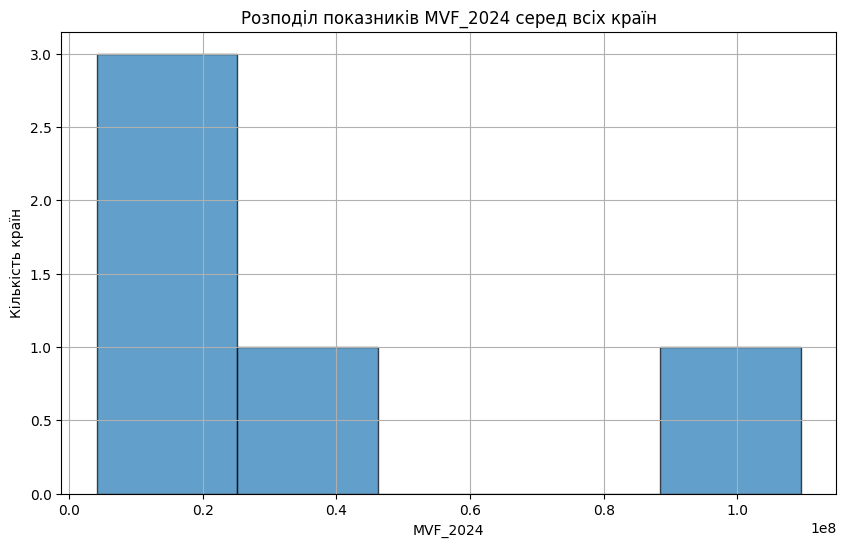

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['MVF_2024'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Розподіл показників MVF_2024 серед всіх країн')
plt.xlabel('MVF_2024')
plt.ylabel('Кількість країн')
plt.grid(True)
plt.show()

16. Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?

In [ ]:
df.set_index('Country', inplace=True)
total_values = df.sum()
percentage_shares = df.divide(total_values, axis=1) * 100
print("Частка кожної країни в загальному значенні для кожного року:")
print(percentage_shares)
print("\nЗміна часток між роками:")
for column in percentage_shares.columns:
    print(f"\nЧастка для {column}:")
    print(percentage_shares[[column]].sort_values(by=column, ascending=False))

Частка кожної країни в загальному значенні для кожного року:
                  MVF_2024  WorldBank_2023   OON_2022
Country                                              
World            66.163012       66.203286  65.969270
United States\t  17.385709       17.180012  16.842594
China            11.194957       11.173396  11.752066
Germany\t         2.773333        2.797986   2.667250
Japan\t           2.482989        2.645321   2.768820

Зміна часток між роками:

Частка для MVF_2024:
                  MVF_2024
Country                   
World            66.163012
United States\t  17.385709
China            11.194957
Germany\t         2.773333
Japan\t           2.482989

Частка для WorldBank_2023:
                 WorldBank_2023
Country                        
World                 66.203286
United States\t       17.180012
China                 11.173396
Germany\t              2.797986
Japan\t                2.645321

Частка для OON_2022:
                  OON_2022
Country                

17. Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


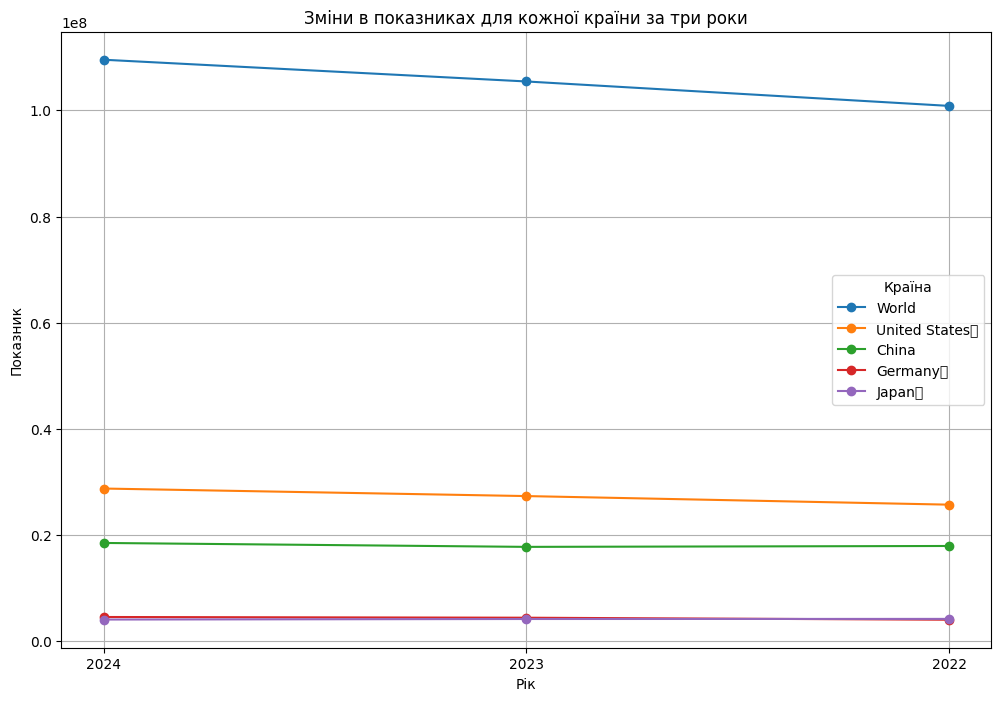

In [ ]:
data = {'Country' : ['World', 'United States	', 'China', 'Germany	', 'Japan	'],
        'MVF_2024' : [109529216.0,28781083.0,18532633.0,4591100.0,4110452.0],
        'WorldBank_2023' : [105435540.0,27360935.0,17794782.0,4456081.0,4212945.0],
        'OON_2022':[100834796.0,25744100.0,17963170.0,4076923.0,4232173.0]}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars=['Country'], var_name='Year', value_name='Value')
df_melted['Year'] = df_melted['Year'].replace({'MVF_2024': '2024',
                                               'WorldBank_2023': '2023',
                                               'OON_2022': '2022'})

plt.figure(figsize=(12, 8))

for country in df['Country']:
    country_data = df_melted[df_melted['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], marker='o', label=country)

plt.title('Зміни в показниках для кожної країни за три роки')
plt.xlabel('Рік')
plt.ylabel('Показник')
plt.legend(title='Країна')
plt.grid(True)
plt.show()

# Завдання 2

In [1]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


1. Вивести перших 5 рядків.

In [2]:
file_path = '/content/drive/My Drive/titanic.csv'
df = pd.read_csv(file_path)


df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2. Визначити розмір датасета.

In [3]:
df.shape

(418, 12)

3. Визначити тип даних.

In [4]:
print("\nТипи даних стовпців:\n", df.dtypes)


Типи даних стовпців:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


4. Визначити наявність пропущених значень. При наявності, замінити
пропущені значення на середнє значення.

In [5]:
print("Пропущені значення в кожному стовпці:\n", df.isnull().sum())

df = df.fillna(df.mean(numeric_only=True))

Пропущені значення в кожному стовпці:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


5. Ще раз перевірити наявність пропущених значень.

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


6. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [7]:
print(f"Кількість дублікатів у датасеті: {df.duplicated().sum()}")

Кількість дублікатів у датасеті: 0


7. Вивести описову статистику датасету describe()

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


8. Видалити стовпчик Cabin

In [9]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


9. Сформувати датасет з обраними стовпцями:
 ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [10]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


10. Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
значення даного стовпчика).

In [11]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64


11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).

In [12]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


12. Вивести 5 перших рядків датасету.

In [13]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


13. Вивести 5 останніх рядків датасету.


In [14]:
df.tail(5)

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання
для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?

In [15]:
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean() * 100

print(survival_rate_by_gender)

Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


15. Обчисліть відсоток виживання для кожного класу (Pclass). Який
клас мав найвищий рівень виживання (дати відповідь)?

In [16]:
survival_rates_by_class = df.groupby('Pclass')['Survived'].mean() * 100

print(survival_rates_by_class)

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)?

In [17]:
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print(f"Середній вік тих, хто вижив: {average_age_survived:.2f} років")
print(f"Середній вік тих, хто не вижив: {average_age_not_survived:.2f} років")

Середній вік тих, хто вижив: 30.27 років
Середній вік тих, хто не вижив: 30.27 років


17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
обчисліть рівень виживання для кожної групи. Як тариф впливав на
шанси виживання (дати відповідь)?

In [18]:
fare_bins = [0, 7.91, 14.454, 31, 512]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

survival_rates_by_fare_group = df.groupby('FareGroup', observed=False)['Survived'].mean() * 100

print("Рівень виживання для кожної групи тарифів:")
print(survival_rates_by_fare_group)

Рівень виживання для кожної групи тарифів:
FareGroup
Low          26.785714
Medium       26.881720
High         41.176471
Very High    50.000000
Name: Survived, dtype: float64


18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу
(Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

In [19]:
average_fare_per_class = df.groupby('Pclass')['Fare'].mean()

print(average_fare_per_class)

Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?

In [20]:
average_age_per_class = df.groupby('Pclass')['Age'].mean()

print(average_age_per_class)

Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив.
Чи є видимі відмінності у вікових групах (дати відповідь)?

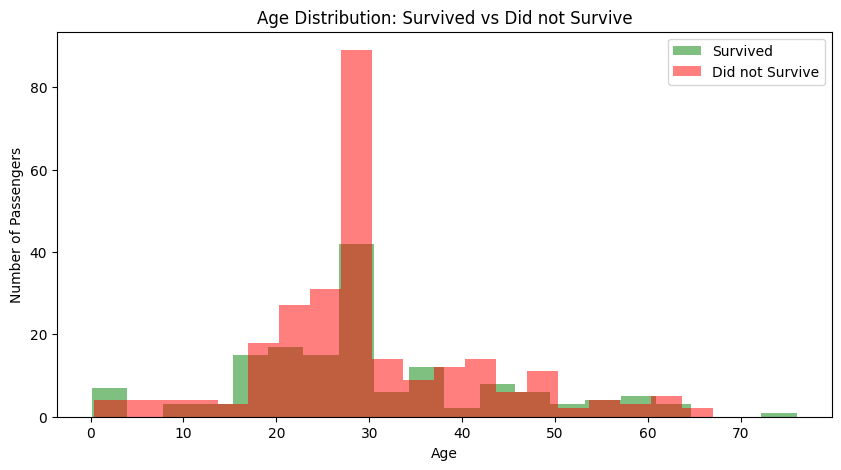

In [21]:
plt.figure(figsize=(10,5))
df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, color='green', label='Survived')

df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, color='red', label='Did not Survive')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution: Survived vs Did not Survive')
plt.legend()
plt.show()

21. Обчисліть відсоток виживання для кожної комбінації статі та класу
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
мала найвищий рівень виживання (дати відповідь)?

In [22]:
survival_rates = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

print(survival_rates)

Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


22. Обчисліть кореляцію між усіма числовими змінними (Survived,
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
виживанням (дати відповідь)?

In [23]:
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

print(correlation_matrix)

          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000
